## Descriptive Statistics

In [209]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix



## Data Overview and Cleaning
- Inspect Data: Get an overview of the dataset, check for missing values, data types, and unique values.
Handle Missing Values: Address any missing values appropriately, possibly using imputation or removal based on the context.
Clean Data: Remove or correct any anomalies or inconsistencies in the dataset (e.g., incorrect data types, typos).

In [210]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('gendered_data.csv')

# Summary Statistics: Generate summary statistics for numeric columns.
print('Data Set Info')
print(df.info())
print()
print('Describe Data Set')
print(df.describe())
print()
print('Nunique: Counts number of distinct elements in specified axis. Returns Series with number of distinct elements')
print(df.nunique())


Data Set Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              742 non-null    int64  
 1   Job Title               742 non-null    object 
 2   Salary Estimate         742 non-null    object 
 3   Job Description         742 non-null    object 
 4   Rating                  742 non-null    float64
 5   Company Name            742 non-null    object 
 6   Location                742 non-null    object 
 7   Headquarters            742 non-null    object 
 8   Size                    742 non-null    object 
 9   Founded                 742 non-null    int64  
 10  Type of ownership       742 non-null    object 
 11  Industry                742 non-null    object 
 12  Sector                  742 non-null    object 
 13  Revenue                 742 non-null    object 
 14  Competitors             742 

In [211]:
# Value Counts: Check the distribution of categorical variables
print('Categorical Varialbes: "Job Title"')
print(df['Job Title'].value_counts())
print()
print()
print('Categorical Varialbes: "Industry"')
print(df['Industry'].value_counts())

Categorical Varialbes: "Job Title"
Job Title
Data Scientist                     131
Data Engineer                       53
Senior Data Scientist               34
Data Analyst                        15
Senior Data Engineer                14
                                  ... 
Data Scientist/ML Engineer           1
Sr. Data Scientist                   1
Data Engineer 4 - Contract           1
Data Analyst - Asset Management      1
Machine Learning Engineer (NLP)      1
Name: count, Length: 264, dtype: int64


Categorical Varialbes: "Industry"
Industry
Biotech & Pharmaceuticals                   112
Insurance Carriers                           63
Computer Hardware & Software                 59
IT Services                                  50
Health Care Services & Hospitals             49
Enterprise Software & Network Solutions      42
Internet                                     29
Consulting                                   29
Aerospace & Defense                          25
Advertisin

## Exploratory Visualizations

<Axes: >

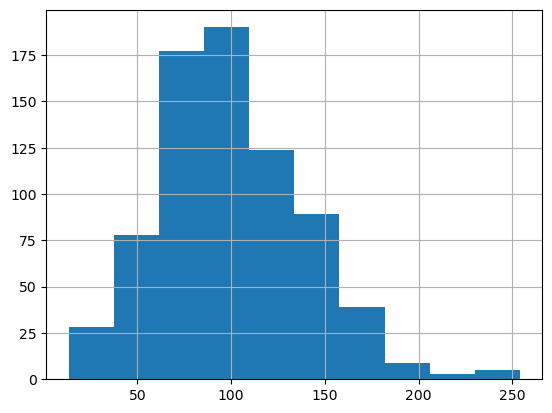

In [212]:
# Histograms and Boxplots: Visualize the distribution of numeric features like salary, rating, and description length.
df['avg_salary'].hist()


<Axes: >

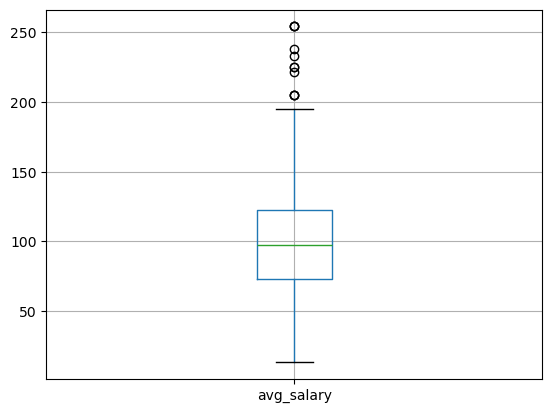

In [213]:
df.boxplot(column=['avg_salary'])

<Axes: >

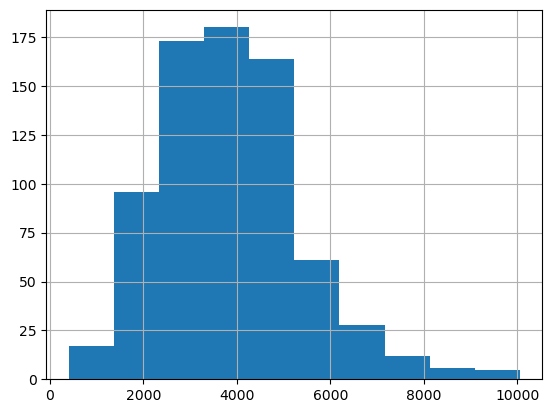

In [214]:
#  Job description length 
df['desc_len'].hist()

In [215]:
# Ensure all entries are strings, replacing NaN with an empty string
df['Agentic_Words'] = df['Agentic_Words'].fillna('').astype(str)
df['Communal_Words'] = df['Communal_Words'].fillna('').astype(str)

agentic_counter = Counter(' '.join(df['Agentic_Words']).split())
communal_counter = Counter(' '.join(df['Communal_Words']).split())

print(agentic_counter.most_common(10))
print(communal_counter.most_common(10))

[('Strong', 485), ('strong', 332), ('internal', 330), ('scientific', 319), ('innovative', 282), ('external', 279), ('quantitative', 254), ('high', 239), ('leadership', 233), ('equal', 233)]
[('team', 2148), ('support', 787), ('understanding', 382), ('partner', 320), ('patient', 229), ('collaborative', 170), ('community', 163), ('cross-functional', 129), ('Collaborate', 127), ('family', 110)]


<Axes: xlabel='Industry'>

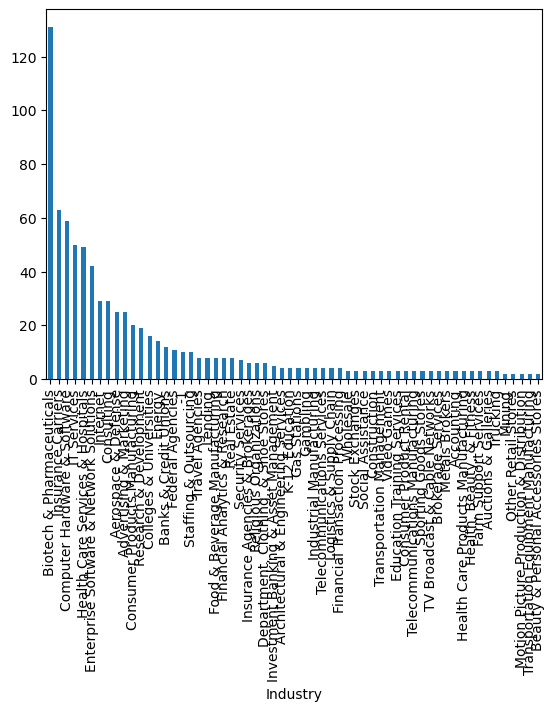

In [216]:
#Bar Plots: Visualize the counts of different job titles, industries, and other categorical variables.
df['Job Title'].value_counts().plot(kind='bar')
df['Industry'].value_counts().plot(kind='bar')


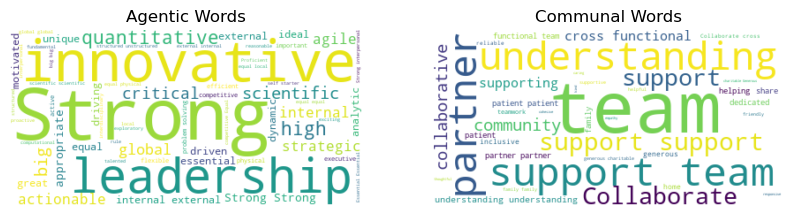

In [217]:
# Word Clouds: Create word clouds for agentic and communal words to visualize common terms
agentic_text = ' '.join(df['Agentic_Words'])
communal_text = ' '.join(df['Communal_Words'])

agentic_wc = WordCloud(background_color='white').generate(agentic_text)
communal_wc = WordCloud(background_color='white').generate(communal_text)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(agentic_wc, interpolation='bilinear')
plt.title('Agentic Words')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(communal_wc, interpolation='bilinear')
plt.title('Communal Words')
plt.axis('off')

plt.show()

## Correlation Analysis

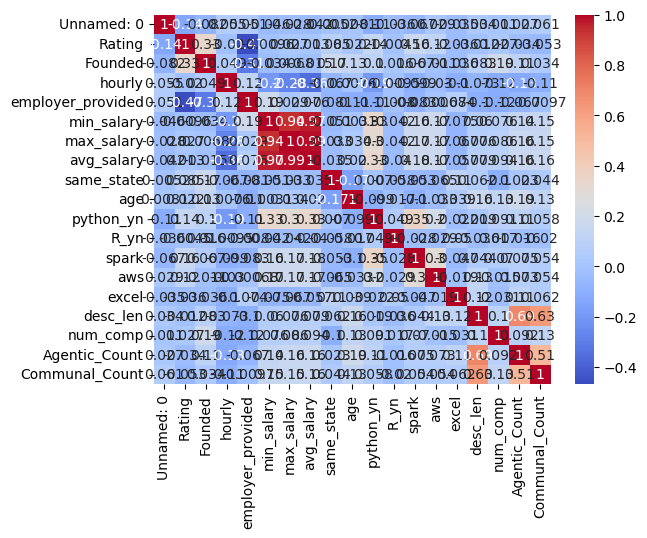

In [218]:
# Correlation Matrix: Compute and visualize the correlation matrix for numeric features.
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute and visualize the correlation matrix for numeric features
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Text Analysis

In [219]:
# Text Length Analysis: Analyze the length of job descriptions
df['desc_len'].describe()

count      742.000000
mean      3869.545822
std       1521.495868
min        407.000000
25%       2801.000000
50%       3731.000000
75%       4740.000000
max      10051.000000
Name: desc_len, dtype: float64

In [220]:
# Word Frequency: Calculate the frequency of agentic and communal words
agentic_counter = Counter(' '.join(df['Agentic_Words']).split())
communal_counter = Counter(' '.join(df['Communal_Words']).split())

print(agentic_counter.most_common(10))
print(communal_counter.most_common(10))

[('Strong', 485), ('strong', 332), ('internal', 330), ('scientific', 319), ('innovative', 282), ('external', 279), ('quantitative', 254), ('high', 239), ('leadership', 233), ('equal', 233)]
[('team', 2148), ('support', 787), ('understanding', 382), ('partner', 320), ('patient', 229), ('collaborative', 170), ('community', 163), ('cross-functional', 129), ('Collaborate', 127), ('family', 110)]


## Gendered Language Patterns

array([[<Axes: title={'center': 'Agentic_Count'}>,
        <Axes: title={'center': 'Communal_Count'}>]], dtype=object)

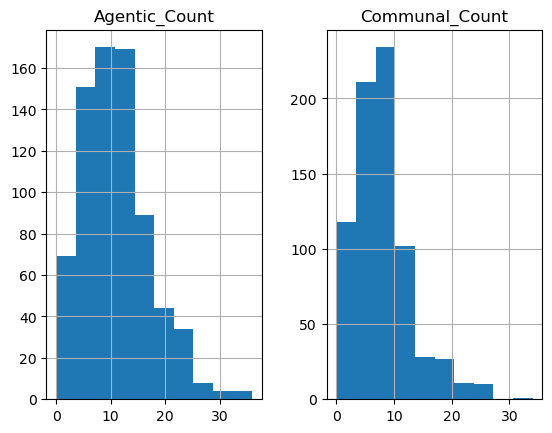

In [221]:
# Agentic vs Communal Word Counts: Compare the count of agentic and communal words across job descriptions.
df[['Agentic_Count', 'Communal_Count']].describe()
df[['Agentic_Count', 'Communal_Count']].hist()


In [223]:
# Top Job Titles by Gendered Language: Identify job titles with the highest and lowest counts of agentic and communal words.
agentic_top_titles = df.groupby('Job Title')['Agentic_Count'].sum().sort_values(ascending=False)
communal_top_titles = df.groupby('Job Title')['Communal_Count'].sum().sort_values(ascending=False)

print(agentic_top_titles.head(10))
print(communal_top_titles.head(10))



Job Title
Data Scientist                               1339
Data Engineer                                 512
Senior Data Scientist                         416
Senior Data Engineer                          161
Data Analyst                                  157
Senior Data Analyst                           143
Lead Data Scientist                           137
Managing Data Scientist/ML Engineer            72
Senior Scientist - Regulatory Submissions      72
Senior Insurance Data Scientist                69
Name: Agentic_Count, dtype: int64
Job Title
Data Scientist                                                                           909
Data Engineer                                                                            402
Senior Data Scientist                                                                    238
Senior Data Analyst                                                                      143
Senior Data Engineer                                                      

## Feature Engineering

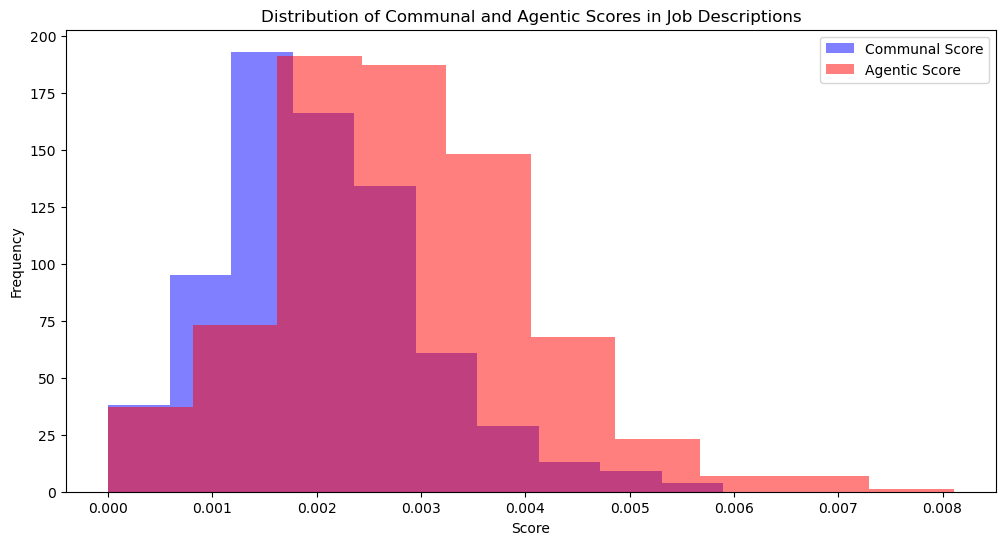

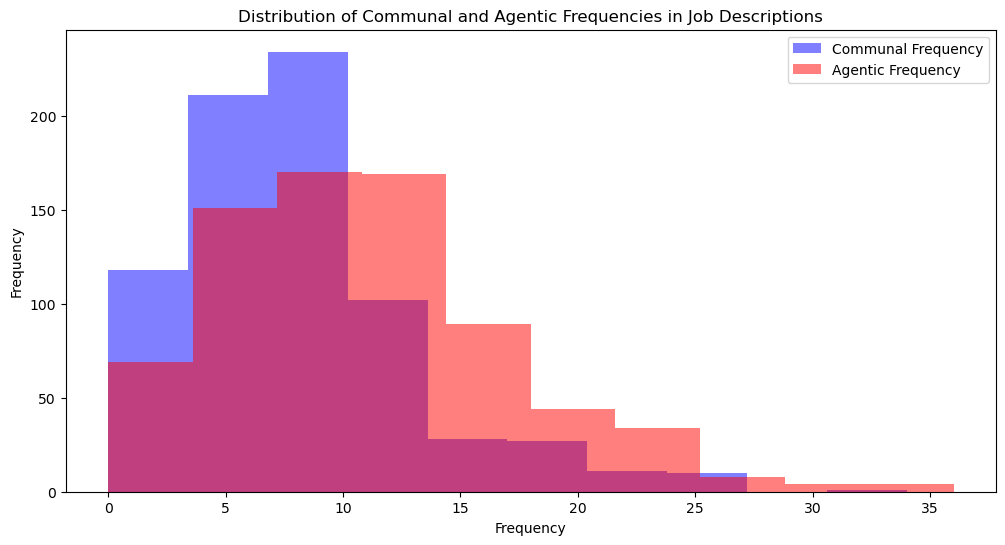

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 742 non-null    int64  
 1   Job Title                  742 non-null    object 
 2   Salary Estimate            742 non-null    object 
 3   Job Description            742 non-null    object 
 4   Rating                     742 non-null    float64
 5   Company Name               742 non-null    object 
 6   Location                   742 non-null    object 
 7   Headquarters               742 non-null    object 
 8   Size                       742 non-null    object 
 9   Founded                    742 non-null    int64  
 10  Type of ownership          742 non-null    object 
 11  Industry                   742 non-null    object 
 12  Sector                     742 non-null    object 
 13  Revenue                    742 non-null    object 

In [229]:
# Example: Normalizing by the description length
df['communal_score_normalized'] = df['Communal_Count'] / df['desc_len']
df['agentic_score_normalized'] = df['Agentic_Count'] / df['desc_len']


plt.figure(figsize=(12, 6))
df['communal_score_normalized'].plot(kind='hist', alpha=0.5, label='Communal Score', color='blue')
df['agentic_score_normalized'].plot(kind='hist', alpha=0.5, label='Agentic Score', color='red')
plt.legend()
plt.xlabel('Score')
plt.title('Distribution of Communal and Agentic Scores in Job Descriptions')
plt.show()

plt.figure(figsize=(12, 6))
df['Communal_Count'].plot(kind='hist', alpha=0.5, label='Communal Frequency', color='blue')
df['Agentic_Count'].plot(kind='hist', alpha=0.5, label='Agentic Frequency', color='red')
plt.legend()
plt.xlabel('Frequency')
plt.title('Distribution of Communal and Agentic Frequencies in Job Descriptions')
plt.show()

print(df.info())


In [224]:
# Create New Features: Develop new features that might help in modeling, such as ratios of agentic to communal words, or binary indicators for presence of certain keywords.
df['agentic_to_communal_ratio'] = df['Agentic_Count'] / (df['Communal_Count'] + 1)
df['has_agentic_words'] = df['Agentic_Count'] > 0
df['has_communal_words'] = df['Communal_Count'] > 0

# Text Length Analysis: Analyze the length of job descriptions
df['agentic_to_communal_ratio'].describe()



count    742.000000
mean       1.475845
std        1.113377
min        0.000000
25%        0.833333
50%        1.250000
75%        1.800000
max       10.000000
Name: agentic_to_communal_ratio, dtype: float64

                        agentic_communal_ratio  desc_len       age  \
agentic_communal_ratio                1.000000 -0.001278  0.011775   
desc_len                             -0.001278  1.000000  0.163911   
age                                   0.011775  0.163911  1.000000   
avg_salary                           -0.002072  0.078808  0.019655   
Rating                               -0.001470 -0.012281  0.021655   
Founded                               0.052769  0.083119  0.134682   
same_state                            0.056185  0.062387 -0.166680   
num_comp                             -0.026039  0.104620  0.126687   
job_simp_encoded                     -0.113105 -0.067297 -0.027740   
seniority_encoded                    -0.065601  0.109600 -0.001431   
location_encoded                     -0.113493 -0.006841  0.012541   
company_size_encoded                  0.046715 -0.057843 -0.064982   
ownership_encoded                    -0.038853  0.140883  0.148453   
industry_encoded    

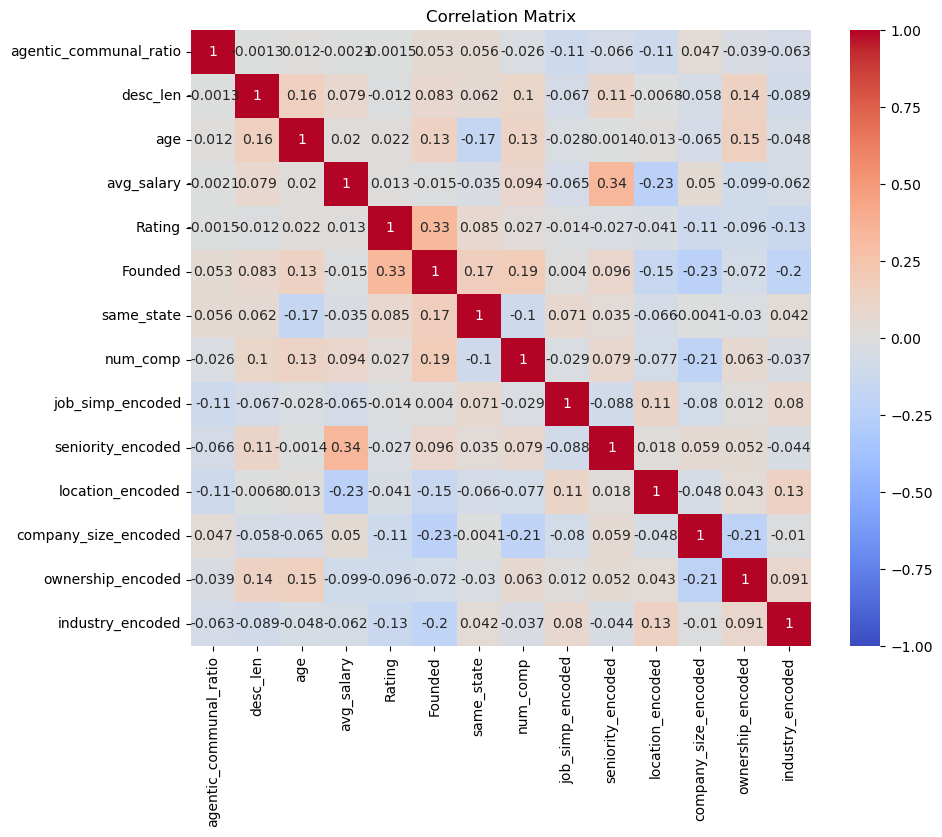

In [225]:
# Calculate the agentic to communal ratio and ensure it is added to the DataFrame
df['agentic_communal_ratio'] = df['Agentic_Count'] / (df['Communal_Count'] + 1)

# Convert categorical features to numerical data types
# Example: Encode 'job_simp' and 'seniority' as categorical variables
df['job_simp_encoded'] = pd.factorize(df['job_simp'])[0]
df['seniority_encoded'] = pd.factorize(df['seniority'])[0]
df['location_encoded'] = pd.factorize(df['Location'])[0]
df['company_size_encoded'] = pd.factorize(df['Size'])[0]
df['ownership_encoded'] = pd.factorize(df['Type of ownership'])[0]
df['industry_encoded'] = pd.factorize(df['Industry'])[0]

# Select relevant features for correlation analysis
features = [
    'agentic_communal_ratio', 'desc_len', 'age', 'avg_salary', 'Rating', 
    'Founded', 'same_state', 'num_comp', 'job_simp_encoded', 'seniority_encoded',
    'location_encoded', 'company_size_encoded', 'ownership_encoded', 'industry_encoded',
]
# Create a DataFrame with the selected features
correlation_df = df[features]

# Compute the correlation matrix
corr_matrix = correlation_df.corr()

print(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Feature Selection
Based on the correlation matrix, select relevant features for your model. We'll focus on features that show meaningful correlations with agentic_communal_ratio.

In [226]:
# Select features based on correlation findings
selected_features = [
    'same_state', 'Founded', 'job_simp_encoded', 'seniority_encoded', 'location_encoded',
    'avg_salary', 'company_size_encoded', 'ownership_encoded', 'industry_encoded'
]

# Add more features if needed based on your specific analysis and model requirements
# Example: selected_features.extend(['additional_feature1', 'additional_feature2'])
# Example complex criteria for Gender_Bias_Label:
# - Label as biased if the ratio of agentic to communal words is above a certain threshold.
# - Label as biased if the count of agentic words exceeds a specific threshold and communal words are below a different threshold.
# - Label as biased if job descriptions contain high counts of agentic words and the job is in a senior position.

# Define thresholds
agentic_communal_ratio_threshold = 1.5
agentic_word_count_threshold = 10
communal_word_count_threshold = 5
seniority_levels = ['senior', 'lead', 'manager', 'director']

# Create the complex label
df['Gender_Bias_Label'] = (
    (df['Agentic_Count'] / (df['Communal_Count'] + 1) > agentic_communal_ratio_threshold) |  # High agentic to communal ratio
    ((df['Agentic_Count'] > agentic_word_count_threshold) & (df['Communal_Count'] < communal_word_count_threshold)) |  # High agentic and low communal words
    (df['job_simp'].str.contains('|'.join(seniority_levels), case=False))  # Senior level jobs
).astype(int)

# Create the feature matrix X and target vector y
X = df[selected_features]
y = df['Gender_Bias_Label']  # Assuming 'Gender_Bias_Label' is your target variable



## Model Selection
Choose a suitable machine learning model that can handle both numerical and categorical features. Random Forest Classifier is a robust choice due to its ability to handle varied data types and provide feature importances.

In [227]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

# Optionally, visualize feature importances if RandomForestClassifier is used
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)


Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        81
           1       0.94      0.74      0.83        68

    accuracy                           0.86       149
   macro avg       0.88      0.85      0.85       149
weighted avg       0.87      0.86      0.86       149


Feature Importances:
                Feature  Importance
5            avg_salary    0.219500
4      location_encoded    0.171033
1               Founded    0.161231
2      job_simp_encoded    0.125326
8      industry_encoded    0.123868
6  company_size_encoded    0.080955
7     ownership_encoded    0.055437
3     seniority_encoded    0.034890
0            same_state    0.027759


NOTE: Make sure to replace rf_model, X_test, and y_test with your actual trained model and test data. This evaluation process helps you understand how well your model is performing in identifying patterns related to gender bias in job descriptions based on the selected features and the chosen machine learning algorithm.

## Model Evaluation
Evaluate the model using appropriate metrics such as accuracy, precision, recall, and F1-score. The classification_report function provides a comprehensive summary of these metrics for both classes in your target variable.

In [228]:
# Assuming rf_model is already trained and X_test, y_test are defined

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Evaluate using precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Print the classification report for detailed metrics
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Optionally, visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)


Accuracy: 0.86
Precision: 0.94
Recall: 0.74
F1-score: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        81
           1       0.94      0.74      0.83        68

    accuracy                           0.86       149
   macro avg       0.88      0.85      0.85       149
weighted avg       0.87      0.86      0.86       149


Confusion Matrix:
[[78  3]
 [18 50]]


### Findings:

##### Accuracy: 0.86
Accuracy is the proportion of correctly predicted instances (both true positives and true negatives) among all instances in the test set. In this case, the model achieved an accuracy of 0.86, which means it correctly predicted 86% of the job descriptions' gender bias labels.


##### Precision: 0.94
Precision is the proportion of true positive predictions (correctly predicted positive instances) among all positive predictions made by the model. A precision score of 0.94 indicates that when the model predicts a job description as having gender bias, it is correct 94% of the time.


##### Recall: 0.74
Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions among all actual positive instances in the test set. A recall score of 0.74 means that the model correctly identified 74% of all job descriptions that actually have gender bias.


##### F1-score: 0.83
The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both measures. An F1-score of 0.83 indicates a good balance between precision and recall for the model.

#### Classification Report Interpretation:
- Support: Indicates the number of instances (job descriptions) in each class (0 and 1).

- Precision, Recall, F1-score per class:

    - For class 0 (no gender bias):
        - Precision: 0.81 means 81% of job descriptions predicted as not having gender bias were actually correct.
        - Recall: 0.96 means 96% of actual job descriptions without gender bias were correctly identified by the model.
        - F1-score: 0.88 represents the harmonic mean of precision and recall for class 0.
    - For class 1 (gender bias):
        - Precision: 0.94 indicates 94% of job descriptions predicted as having gender bias were correct.
        - Recall: 0.74 means 74% of actual job descriptions with gender bias were correctly identified by the model.
        - F1-score: 0.83 represents the harmonic mean of precision and recall for class 1.

#### Confusion Matrix Interpretation:
The confusion matrix provides a more detailed breakdown of predictions versus actual labels:
- True Negatives (TN): 78 instances were correctly predicted as not having gender bias.
- False Positives (FP): 3 instances were incorrectly predicted as having gender bias when they did not.
- False Negatives (FN): 18 instances were incorrectly predicted as not having gender bias when they did.
- True Positives (TP): 50 instances were correctly predicted as having gender bias.

## Summary:
The model shows good overall performance with an accuracy of 0.86.
It has high precision (0.94) for predicting gender bias, indicating that when it predicts a job description has gender bias, it is highly likely to be correct.
The recall (0.74) suggests there is room for improvement in correctly identifying all instances of gender bias.
The F1-score (0.83) indicates a balanced performance between precision and recall.
Improvements in recall could potentially be achieved by adjusting the model's threshold or exploring feature engineering to better capture the nuances of gender bias in job descriptions.




---

In [ ]:
# Example complex criteria for Gender_Bias_Label:
# - Label as biased if the ratio of agentic to communal words is above a certain threshold.
# - Label as biased if the count of agentic words exceeds a specific threshold and communal words are below a different threshold.
# - Label as biased if job descriptions contain high counts of agentic words and the job is in a senior position.

# Define thresholds
agentic_communal_ratio_threshold = 1.5
agentic_word_count_threshold = 10
communal_word_count_threshold = 5
seniority_levels = ['senior', 'lead', 'manager', 'director']

# Create the complex label
df['Gender_Bias_Label'] = (
    (df['Agentic_Count'] / (df['Communal_Count'] + 1) > agentic_communal_ratio_threshold) |  # High agentic to communal ratio
    ((df['Agentic_Count'] > agentic_word_count_threshold) & (df['Communal_Count'] < communal_word_count_threshold)) |  # High agentic and low communal words
    (df['job_simp'].str.contains('|'.join(seniority_levels), case=False))  # Senior level jobs
).astype(int)

# Prepare Data for Modeling

In [ ]:
# Split Data: Split the data into training and testing sets for model validation.
X = df[['desc_len', 'Agentic_Count', 'Communal_Count', 'age', 'avg_salary']]  # Example feature set
y = df['Gender_Bias_Label']  # Assuming a target label for gender bias

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling and Evaluation

In [ ]:
# Train Models: Apply machine learning models (e.g., logistic regression, decision trees, etc.) to predict gender bias.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


## Interpretation and Insights
- Analyze Model Results: Evaluate model performance, interpret coefficients, and analyze misclassified instances to draw insights about gendered language patterns.
- Feature Importance: Identify which features are most predictive of gender bias in job descriptions.